In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import plotly.graph_objects as go
import os
import base64

In [7]:
path = "c:/Users/18565/Desktop/Classes/VA/Project/Code/VA-Project"

In [63]:
distinct_paths = pd.read_csv(os.path.join(path,"data\distant_paths.csv"),index_col=0)

In [64]:
self_loop = []
for i in distinct_paths['Path']:
    if i.split(" ")[0]==i.split(" ")[-1]:
        self_loop.append(1)
    else:
        self_loop.append(0)
        

In [65]:
distinct_paths['self_loop']=self_loop

In [66]:
temp = distinct_paths[distinct_paths['self_loop']==0]

In [67]:
temp['Path']

1               camping0 to camping2
2               camping0 to camping3
3               camping0 to camping4
4              camping0 to entrance1
5                  camping0 to gate1
                   ...              
200    ranger-stop4 to general-gate7
202            ranger-stop5 to gate4
204            ranger-stop6 to gate5
205            ranger-stop6 to gate6
207            ranger-stop7 to gate7
Name: Path, Length: 182, dtype: object

In [13]:
coordinates = pd.read_csv(os.path.join(path,"data/Mapping Park Area.csv"))

In [14]:
def adjust_map_coordinates(corordinates):
    y_cordinate = []
    midpoint = 982/2
    x_length = 982
    y_length = 982
    for j in list(corordinates['y_coordinate']):
        if j > midpoint:
            y_cordinate.append(y_length-j)
        elif j <midpoint:
            y_cordinate.append(x_length-j)
        else:
            y_cordinate.append(j)
    corordinates['y_coordinate'] = y_cordinate
    pos = {}
    for key,x,y in zip(list(corordinates['gate_name']),list(corordinates['x_coordinate']),list(corordinates['y_coordinate'])):
        pos[key] = [x,y]
    return corordinates, pos

In [15]:
coordinates, pos= adjust_map_coordinates(coordinates)

In [68]:
both = []
for i in temp['Path']:
    edge = i.split(" ")
    edge.reverse()
    edge = " ".join(edge)
    if edge in list(temp['Path']):
        both.append(1)
    else:
        both.append(0)

In [8]:
df = pd.read_csv(os.path.join(path,"data/Lekagul Sensor Data.csv"))

In [9]:
self_loop_df = pd.read_csv(os.path.join(path,"data/selploop.csv"),index_col=0)

C:\Users\18565\AppData\Local\Temp\ipykernel_17892\3418713907.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  self_loop_df = pd.read_csv(os.path.join(path,"data/selploop.csv"),index_col=0)


In [10]:
self_loop_df['car_type'] = self_loop_df['car_type'].astype(str)

In [11]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index("Timestamp",inplace=True)

In [69]:
unique_cars = list(self_loop_df['car-id'])

In [70]:
entry_gate = []
exit_gate = []
for car_id in unique_cars:
    car_df = df[df['car-id']==car_id]
    entry_gate.append(car_df['gate-name'].loc[car_df.index[0]])
    exit_gate.append(car_df['gate-name'].loc[car_df.index[-1]])

In [18]:
self_loop_df['entry_gate'] = entry_gate
self_loop_df['exit_gate'] = exit_gate

In [19]:
self_loop_df.to_csv(os.path.join(path,"data/selploop.csv"))

In [20]:
np.unique(self_loop_df['entry_gate'])

array(['entrance0', 'entrance1', 'entrance2', 'entrance3', 'entrance4',
       'ranger-base'], dtype=object)

In [21]:
c=0
for i in self_loop_df['exit_gate']:
    if i in ['camping0', 'camping2', 'camping3', 'camping4', 'camping5','camping6', 'camping7', 'camping8']:
        c+=1

In [71]:
df['count']=np.ones(len(df))

In [40]:
X =[]
Y = []
Size = []
Gates = []
for car_type in  ['1', '2', '2P', '3', '4', '5', '6']:
    x =[]
    y = []
    size =[]
    gates = []
    car_type_df = df[df['car-type']==car_type].groupby(['gate-name'])['count'].sum()
    for i in range(len(car_type_df)):
        cords = pos[car_type_df.index[i]]
        size.append(car_type_df.iloc[i])
        x.append(cords[0])
        y.append(cords[1])
        gates.append(car_type_df.index[i])
    Gates.append(gates)
    X.append(x)
    Y.append(y)
    Size.append(size)

In [48]:
texts = []
for i in range(len(Size)):
    text = [f"Gate: {i}<br>Recorded : {j}" for i,j in zip(Gates[i],Size[i])]
    texts.append(text)

In [34]:
for car_type in  ['1', '2', '2P', '3', '4', '5', '6']:
    car_type_df = df[df['car-type']==car_type].groupby(['gate-name'])['count'].sum()
    print(len(car_type_df),len(np.unique(car_type_df.index)))

25 25
24 24
35 35
24 24
17 17
12 12
12 12


In [45]:
X_all = coordinates['x_coordinate']
y_all = coordinates['y_coordinate']
gates_all = [f"Gate: {i}" for i in coordinates['gate_name']]

In [51]:
with open("./invert_f.jpg", "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

# Create figure
fig = go.Figure()
trace_all = go.Scatter(x=X_all, y=y_all, mode='markers',text = gates_all,marker=dict(size=6, color='rgba(0,0,255,1)'),showlegend=False,name="")
trace_car1_1 = go.Scatter(x=X[0], y=Y[0],text = texts[0] , mode='markers', marker=dict(size=(np.array(Size[0])/max(Size[0]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car1_2 = go.Scatter(x=X[0], y=Y[0], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car2_1 = go.Scatter(x=X[1], y=Y[1],text = texts[1], mode='markers', marker=dict(size= (np.array(Size[1])/max(Size[1]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car2_2 = go.Scatter(x=X[1], y=Y[1], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car2P_1 = go.Scatter(x=X[2], y=Y[2],text = texts[2], mode='markers', marker=dict(size=(np.array(Size[2])/max(Size[2]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car2P_2 = go.Scatter(x=X[2], y=Y[2], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car3_1 = go.Scatter(x=X[3], y=Y[3],text = texts[3], mode='markers', marker=dict(size=(np.array(Size[3])/max(Size[3]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car3_2 = go.Scatter(x=X[3], y=Y[3], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car4_1 = go.Scatter(x=X[4], y=Y[4],text = texts[4], mode='markers', marker=dict(size=(np.array(Size[4])/max(Size[4]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car4_2 = go.Scatter(x=X[4], y=Y[4], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car5_1 = go.Scatter(x=X[5], y=Y[5],text = texts[5], mode='markers', marker=dict(size=(np.array(Size[5])/max(Size[5]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car5_2 = go.Scatter(x=X[5], y=Y[5], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car6_1 = go.Scatter(x=X[6], y=Y[6],text = texts[6], mode='markers', marker=dict(size=(np.array(Size[6])/max(Size[6]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car6_2 = go.Scatter(x=X[6], y=Y[6], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

fig = go.Figure(data=[trace_all, trace_car1_2, trace_car1_1,trace_car2_2,trace_car2_1,trace_car2P_2,trace_car2P_1,trace_car3_2,
                      trace_car3_1,trace_car4_2,trace_car4_1,trace_car5_2,trace_car5_1,trace_car6_2,trace_car6_1])



fig.add_layout_image(
        dict(
            source=f"data:./invert_f.jpg;base64,{encoded_image}",
            xref="x",
            yref="y",
            x=0,
            y=982,
            sizex=982,
            sizey=982,
            opacity=1,
             sizing="stretch",
            layer="below")
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="1",
                     method="update",
                     args=[{"visible": [True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]},
                           {"title": "Car Type 1",
                            "annotations": []}]),
                dict(label="2",
                     method="update",
                     args=[{"visible": [True, False, False, True, True, False, False, False, False, False, False, False, False, False, False]},
                           {"title":"Car Type 2",
                            "annotations": []}]),
                dict(label="2P",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, True, True, False, False, False, False, False, False, False, False]},
                           {"title": "Car Type 2P",
                            "annotations": []}]),
                dict(label="3",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False, True, True, False, False, False, False, False, False]},
                           {"title":"3",
                            "annotations": []}]),
                dict(label="4",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False, False, False, True, True, False, False, False, False]},
                           {"title": "Car Type 4",
                            "annotations": []}]),
                dict(label="5",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False, False, False, False, False, True, True, False, False]},
                           {"title":"Car Type 5",
                            "annotations": []}]),
                dict(label="6",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False, False, False, False, False, False, False, True, True]},
                           {"title": "Car Type 6",
                            "annotations": []}]),
                
            ]),
        )
    ])


# Set templates
fig.update_layout(height=982,
   width=982,
)
fig.write_html("Entries.html", include_plotlyjs="cdn")
    

In [72]:
car_df['gate-name'].loc[car_df.index[0]]

'ranger-base'

In [73]:
temp['bidirectional'] = both

C:\Users\18565\AppData\Local\Temp\ipykernel_17892\197952084.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
one_way = list(temp[temp['bidirectional']==0]['Path'])

In [96]:
widths = np.ceil(np.array(temp['count'])/temp['count'].mean())

In [100]:
with open("./invert_f.jpg", "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

# Create figure
fig = go.Figure()
analomy = ["entrance1 to ranger-stop1","ranger-stop1 to entrance1"]

for edge, num_entries in zip(temp['Path'][:],widths):
    start_point = pos[edge.split(" ")[0]]
    end_point = pos[edge.split(" ")[-1]]
    fig.add_trace(go.Scatter(x=[start_point[0]], y=[start_point[1]], mode='markers', marker=dict(size=10, color='rgba(0,255,0,0.3)'), name='',showlegend=False))

# Add end point
    fig.add_trace(go.Scatter(x=[end_point[0]], y=[end_point[1]], mode='markers', marker=dict(size=10, color='rgba(0,255,0,0.3)'), name='',showlegend=False))

    # Add arrow line
    if edge in one_way:
        color = "rgba(0,0,255,0.5)"
    
        fig.add_trace(go.Scatter(x=[start_point[0], end_point[0]], y=[start_point[1], end_point[1]],
                                mode='lines',
                                line=dict(color=color, width=num_entries, dash='dashdot'),
                                name='Arrow Line',showlegend=False))

        # Add arrowhead annotation
        
        midpoint = ((start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2)
        
        fig.add_annotation(x=midpoint[0], y=midpoint[1], ax=start_point[0], ay=start_point[1],
                    xref='x', yref='y', axref='x', ayref='y',
                    showarrow=True, arrowhead=3, arrowsize=1, arrowwidth=num_entries, arrowcolor=color)
        continue
    elif edge in analomy:
        color = "rgba(255,0,0,0.5)"  
    else:
        color = "rgba(255,0,255,0.5)"
    fig.add_trace(go.Scatter(x=[start_point[0], end_point[0]], y=[start_point[1], end_point[1]],
                                mode='lines',
                                line=dict(color=color, width=num_entries, dash='dashdot'),
                                name='Arrow Line',showlegend=False))



fig.add_layout_image(
        dict(
            source=f"data:./invert_f.jpg;base64,{encoded_image}",
            xref="x",
            yref="y",
            x=0,
            y=982,
            sizex=982,
            sizey=982,
            opacity=1,
             sizing="stretch",
            layer="below")
)
fig.add_trace(go.Scatter(x=[800,830], y=[900,900], mode='lines', line=dict(color="rgba(0,0,255,1)", width=2, dash='dashdot'),showlegend=False))
fig.add_trace(go.Scatter(x=[880], y=[900], mode='text', text="Unidirectional",textfont=dict(size=7),showlegend=False))
fig.add_trace(go.Scatter(x=[800,830], y=[890,890], mode='lines', line=dict(color="rgba(255,0,0,1)", width=2, dash='dashdot'),showlegend=False))
fig.add_trace(go.Scatter(x=[880], y=[890], mode='text', text="Anomaly",textfont=dict(size=7),showlegend=False))
fig.add_trace(go.Scatter(x=[800,830], y=[880,880], mode='lines', line=dict(color= "rgba(255,0,255,1)", width=2, dash='dashdot'),showlegend=False))
fig.add_trace(go.Scatter(x=[880], y=[880], mode='text', text="Biidirectional",textfont=dict(size=7),showlegend=False))




# Set templates
fig.update_layout(height=982,
   width=982,
)

fig.write_html("distinct_paths.html", include_plotlyjs="cdn")
# fig.show()

In [116]:
in_out_dic = {}
for i,j in zip(self_loop_df['entry_gate'],self_loop_df['exit_gate']):
    key = f"{i} {j}"
    if key in in_out_dic:
        in_out_dic[key]+=1
    else:
        in_out_dic[key] = 1
    
gate_names = np.unique(self_loop_df['exit_gate'])
labels = [f'{category} (Entry)' for category in gate_names] + [f'{category} (Exit)' for category in gate_names]
category_indices = {category: i for i, category in enumerate(gate_names)}
source = []
target = []
value = []
colors = ['rgba(31, 119, 180, 0.5)', 'rgba(255, 127, 14, 0.5)', 'rgba(44, 160, 44, 0.5)', 'rgba(214, 39, 40, 0.5)',
                 'rgba(148, 103, 189, 0.5)', 'rgba(140, 86, 75, 0.5)', 'rgba(227, 119, 194, 0.5)', 'rgba(127, 127, 127, 0.5)',
                 'rgba(188, 189, 34, 0.5)', 'rgba(23, 190, 207, 0.5)', 'rgba(255, 187, 120, 0.5)', 'rgba(44, 160, 44, 0.5)',
                 'rgba(152, 223, 138, 0.5)', 'rgba(255, 152, 150, 0.5)', 'rgba(197, 176, 213, 0.5)']
node_colors = [colors[i % len(colors)] for i in range(len(gate_names))] * 2
link_colors = [colors[category_indices[origin.split(" ")[0]] % len(colors)] for origin in in_out_dic]

source = [category_indices[origin.split(" ")[0]] for origin in in_out_dic]
target = [len(gate_names) + category_indices[origin.split(" ")[-1]] for origin in in_out_dic]
value = [count for count in in_out_dic.values()]

link = {
    'source': source,
    'target': target,
    'value': value,
    'color': link_colors
}

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=link
)])

fig.update_layout(title_text="Origin Destination with Gate Type", font_size=10)
fig.write_html("entry_exit.html")
# fig.show()

In [123]:
exit_ = []
for i in self_loop_df['exit_gate']:
    if i.startswith("entrance"):
        exit_.append(1)
    elif i.startswith("ranger-base"):
        exit_.append(1)
    else:
        exit_.append(0)
        

In [124]:
self_loop_df['exited']=exit_

In [126]:
df.index[-1]

Timestamp('2016-05-31 23:56:06')

In [128]:
self_loop_df['enter_date']

0        2015-09-01 17:00:42
1        2015-09-01 07:00:00
2        2015-08-01 07:00:06
3        2015-07-01 08:00:44
4        2015-09-01 09:00:48
                ...         
18703    2016-03-13 09:59:39
18704    2016-01-15 09:59:07
18705    2016-05-21 10:59:28
18706    2016-04-29 08:59:39
18707    2016-03-29 10:59:35
Name: enter_date, Length: 18708, dtype: object

In [131]:
self_loop_df["time_till_last_data_entry"] = df.index[-1]-pd.to_datetime(self_loop_df['enter_date'])

In [183]:
def to_hours(entry):
    return entry.total_seconds()/3600

In [146]:
self_loop_df['time_till_last_data_entry'] = df.index[-1]-pd.to_datetime(self_loop_df['enter_date'])

In [144]:
self_loop_df['time_till_last_data_entry'] = self_loop_df['time_till_last_data_entry'].apply(to_hours)

In [148]:
import matplotlib.pyplot as plt

In [184]:
x  = self_loop_df[self_loop_df['exited']==0]['car-id']
y = self_loop_df[self_loop_df['exited']==0]['time_till_last_data_entry'].apply(to_hours)

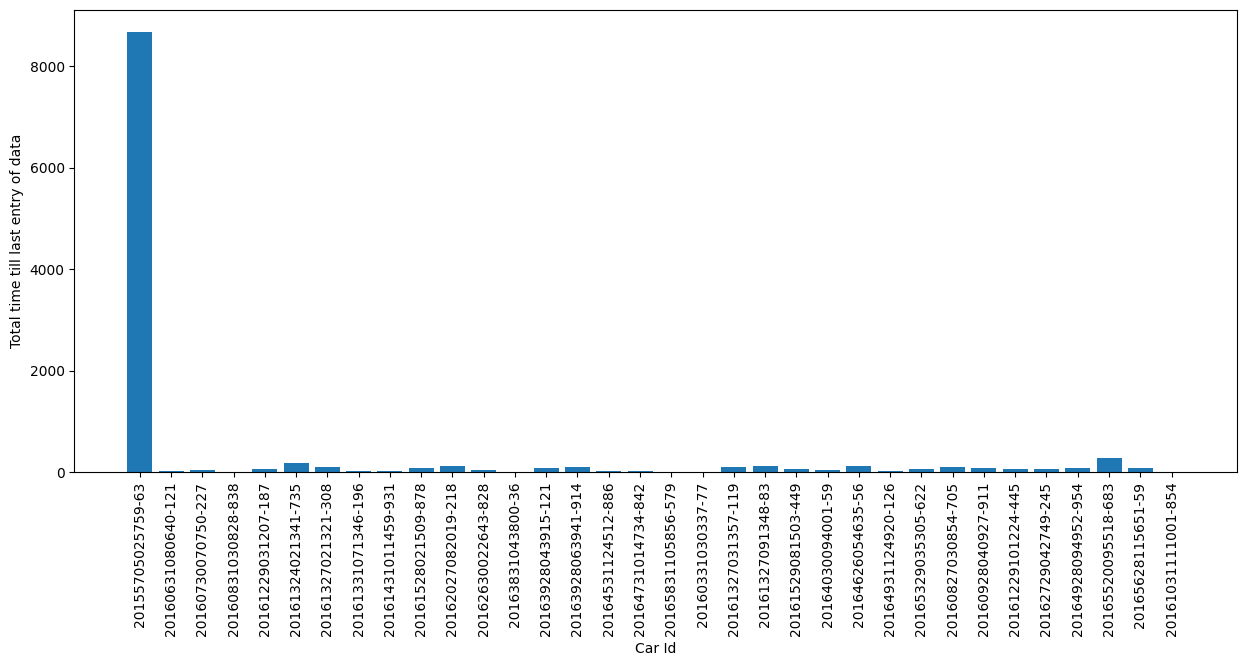

In [185]:
fig,ax  = plt.subplots(figsize=(15,6))
ax.bar(x,y)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Car Id')
ax.set_ylabel('Total time till last entry of data')
plt.show()

In [186]:
x  = self_loop_df[self_loop_df['exited']==0]['car-id'][1:]
y = self_loop_df[self_loop_df['exited']==0]['time_till_last_data_entry'][1:].apply(to_hours)

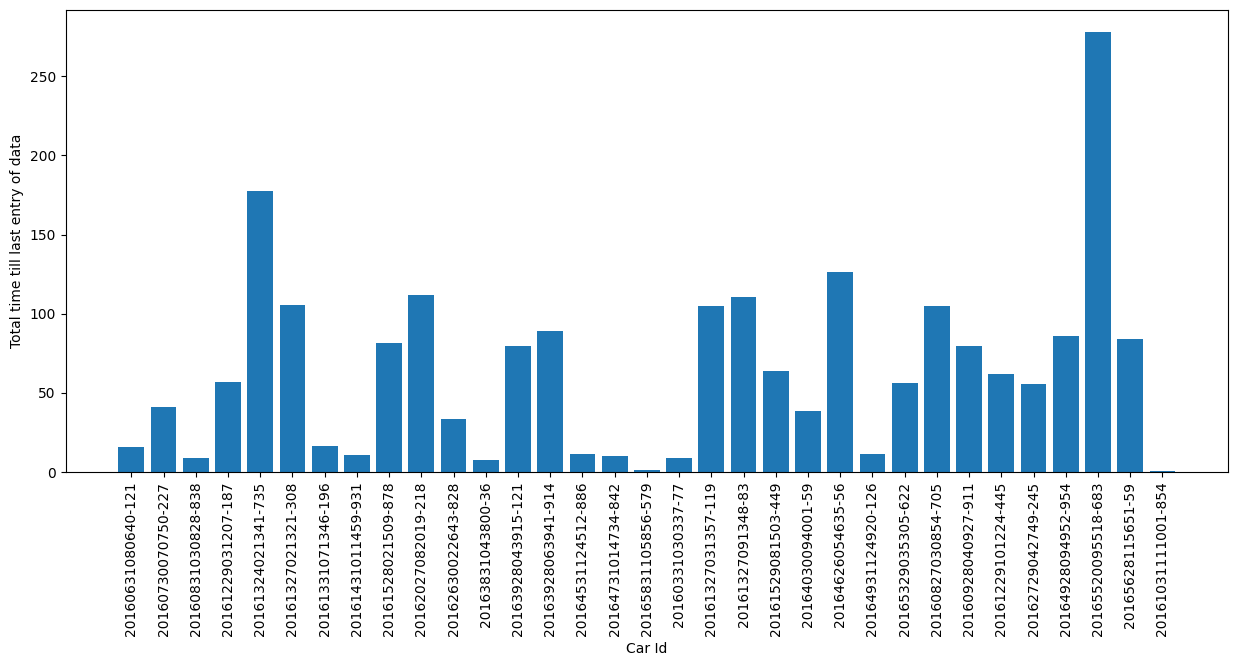

In [187]:
fig,ax  = plt.subplots(figsize=(15,6))
ax.bar(x,y)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Car Id')
ax.set_ylabel('Total time till last entry of data')
plt.show()

In [210]:
outliers =  pd.DataFrame()
for car_id in np.unique(df['car-id']):
    car_df = df[df['car-id']==car_id]
    for i in range(len(car_df)-1):
        if car_df['gate-name'].loc[car_df.index[i]] == "entrance1" and car_df['gate-name'].loc[car_df.index[i+1]] == "ranger-stop1":
            outliers = pd.concat((outliers,car_df))
            break
        if car_df['gate-name'].loc[car_df.index[i]] == "ranger-stop1" and car_df['gate-name'].loc[car_df.index[i+1]] == "entrance1":
            outliers = pd.concat((outliers,car_df))
            break

In [217]:
X= []
Y = []
for car_id in np.unique(outliers['car-id']):
    temp =  outliers[outliers['car-id']==car_id]
    x = []
    y = []
    for i in list(temp["gate-name"]):
        point = pos[i]
        x.append(point[0])
        y.append(point[1])
    X.append(x)
    Y.append(y)
        

In [226]:
outliers.to_csv("imposible_path_taken.csv")

In [247]:
X =[]
Y = []
Size = []
Gates = []
for car_type in  ['1', '2', '2P', '3', '4', '5', '6']:
    x =[]
    y = []
    size =[]
    gates = []
    temp = self_loop_df[self_loop_df['car_type']==car_type][self_loop_df.columns[5:45]].sum()
    for i,j in zip(temp.index,temp):
        if j !=0:
            cords = pos[i]
            size.append(j)
            x.append(cords[0])
            y.append(cords[1])
            gates.append(i)
    Gates.append(gates)
    X.append(x)
    Y.append(y)
    Size.append(size)

In [258]:
texts = []
for i in range(len(Size)):
    text = [f"Gate: {i}<br>Time (Minutes) <br>{j}" for i,j in zip(Gates[i],Size[i])]
    texts.append(text)

In [260]:
with open("./invert_f.jpg", "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

# Create figure
fig = go.Figure()
trace_all = go.Scatter(x=X_all, y=y_all, mode='markers',text = gates_all,marker=dict(size=6, color='rgba(0,0,255,1)'),showlegend=False,name="")
trace_car1_1 = go.Scatter(x=X[0], y=Y[0],text = texts[0] , mode='markers', marker=dict(size=(np.array(Size[0])/max(Size[0]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car1_2 = go.Scatter(x=X[0], y=Y[0], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car2_1 = go.Scatter(x=X[1], y=Y[1],text = texts[1], mode='markers', marker=dict(size= (np.array(Size[1])/max(Size[1]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car2_2 = go.Scatter(x=X[1], y=Y[1], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car2P_1 = go.Scatter(x=X[2], y=Y[2],text = texts[2], mode='markers', marker=dict(size=(np.array(Size[2])/max(Size[2]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car2P_2 = go.Scatter(x=X[2], y=Y[2], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car3_1 = go.Scatter(x=X[3], y=Y[3],text = texts[3], mode='markers', marker=dict(size=(np.array(Size[3])/max(Size[3]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car3_2 = go.Scatter(x=X[3], y=Y[3], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car4_1 = go.Scatter(x=X[4], y=Y[4],text = texts[4], mode='markers', marker=dict(size=(np.array(Size[4])/max(Size[4]))*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car4_2 = go.Scatter(x=X[4], y=Y[4], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car5_1 = go.Scatter(x=X[5], y=Y[5],text = texts[5], mode='markers', marker=dict(size=(np.array(Size[5])/1)*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car5_2 = go.Scatter(x=X[5], y=Y[5], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

trace_car6_1 = go.Scatter(x=X[6], y=Y[6],text = texts[6], mode='markers', marker=dict(size=(np.array(Size[6])/1)*100, color='rgba(255,0,0,0.5)'),showlegend=False,name="")
trace_car6_2 = go.Scatter(x=X[6], y=Y[6], mode='markers', marker=dict(size=6, color='rgba(255,0,0,1)'),showlegend=False,hoverinfo='none',name="")

fig = go.Figure(data=[trace_all, trace_car1_2, trace_car1_1,trace_car2_2,trace_car2_1,trace_car2P_2,trace_car2P_1,trace_car3_2,
                      trace_car3_1,trace_car4_2,trace_car4_1,trace_car5_2,trace_car5_1,trace_car6_2,trace_car6_1])



fig.add_layout_image(
        dict(
            source=f"data:./invert_f.jpg;base64,{encoded_image}",
            xref="x",
            yref="y",
            x=0,
            y=982,
            sizex=982,
            sizey=982,
            opacity=1,
             sizing="stretch",
            layer="below")
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="1",
                     method="update",
                     args=[{"visible": [True, True, True, False, False, False, False, False, False, False, False, False, False, False, False]},
                           {"title": "Car Type 1",
                            "annotations": []}]),
                dict(label="2",
                     method="update",
                     args=[{"visible": [True, False, False, True, True, False, False, False, False, False, False, False, False, False, False]},
                           {"title":"Car Type 2",
                            "annotations": []}]),
                dict(label="2P",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, True, True, False, False, False, False, False, False, False, False]},
                           {"title": "Car Type 2P",
                            "annotations": []}]),
                dict(label="3",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False, True, True, False, False, False, False, False, False]},
                           {"title":"3",
                            "annotations": []}]),
                dict(label="4",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False, False, False, True, True, False, False, False, False]},
                           {"title": "Car Type 4",
                            "annotations": []}]),
                dict(label="5",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False, False, False, False, False, True, True, False, False]},
                           {"title":"Car Type 5",
                            "annotations": []}]),
                dict(label="6",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False, False, False, False, False, False, False, True, True]},
                           {"title": "Car Type 6",
                            "annotations": []}]),
                
            ]),
        )
    ])


# Set templates
fig.update_layout(height=982,
   width=982
)
fig.write_html("timespend.html", include_plotlyjs="cdn")
# fig.show()
    

In [284]:
self_loop_df[self_loop_df.columns[40:]]

,ranger-stop3,ranger-stop4,ranger-stop5,ranger-stop6,ranger-stop7,selfloop,entry_gate,exit_gate,exited,time_till_last_data_entry
0,0.00,0.0,0.00,0.00,0.0,1.0,entrance2,entrance4,1,273 days 06:55:24
1,0.00,0.0,0.00,0.00,0.0,0.0,entrance2,entrance1,1,273 days 16:56:06
2,0.00,0.0,0.00,0.00,0.0,1.0,entrance2,entrance1,1,304 days 16:56:00
3,0.00,0.0,0.00,0.00,0.0,1.0,entrance0,entrance3,1,335 days 15:55:22
4,0.00,0.0,0.00,0.00,0.0,1.0,entrance3,entrance4,1,273 days 14:55:18
...,...,...,...,...,...,...,...,...,...,...
18703,4.03,0.0,0.00,0.00,0.0,2.0,ranger-base,ranger-base,1,79 days 13:56:27
18704,18.03,0.0,0.00,0.00,0.0,2.0,ranger-base,ranger-base,1,137 days 13:56:59
18705,0.00,0.0,16.03,43.03,0.0,4.0,ranger-base,ranger-base,1,10 days 12:56:38
18706,50.03,0.0,11.03,8.03,0.0,3.0,ranger-base,ranger-base,1,32 days 14:56:27


In [287]:
cols = list(self_loop_df.columns[:5])+list(self_loop_df.columns[14:19])+['entry_gate',"exit_gate","exited","time_till_last_data_entry"]

In [289]:
outliers = self_loop_df[self_loop_df[self_loop_df.columns[14:19]].T.sum()>0][cols]

In [299]:
outliers.to_csv('selfloop at entrance.csv')

In [4]:
outliers = pd.read_csv("selfloop at entrance.csv",index_col=0)

In [104]:
df[df['car-id']=="20162027042012-940"]

,car-id,car-type,gate-name,count
Timestamp,,,,
2016-05-27 16:20:12,20162027042012-940,1,entrance2,1.0
2016-05-27 16:37:48,20162027042012-940,1,camping1,1.0
2016-05-29 08:44:04,20162027042012-940,1,camping1,1.0
2016-05-29 08:52:42,20162027042012-940,1,general-gate5,1.0
2016-05-29 09:03:19,20162027042012-940,1,entrance4,1.0
2016-05-29 09:23:21,20162027042012-940,1,entrance4,1.0
2016-05-29 09:33:53,20162027042012-940,1,general-gate5,1.0
2016-05-29 09:42:37,20162027042012-940,1,camping1,1.0
2016-05-29 09:46:39,20162027042012-940,1,camping1,1.0


In [103]:
outliers

,car-id,car_type,enter_date,exit_date,total_in_time,entrance0,entrance1,entrance2,entrance3,entrance4,entry_gate,exit_gate,exited,time_till_last_data_entry
4531,20154112014114-381,1,2015-06-12 13:41:14,2015-07-26 23:00:51,63919.62,6637.30,0.00,0.0,0.00,0.00,entrance0,entrance0,1,354 days 10:14:52
6853,20162027042012-940,1,2016-05-27 16:20:12,2016-05-29 10:51:29,2551.28,0.00,0.00,0.0,0.00,4.03,entrance2,entrance4,1,4 days 07:35:54
7002,20162904122951-717,1,2016-03-04 12:29:51,2016-04-10 22:14:22,53864.52,0.00,0.00,0.0,6639.97,0.00,entrance3,entrance3,1,88 days 11:26:15
10501,20154519024544-322,2,2015-06-19 14:45:44,2015-10-05 00:36:54,154671.17,0.00,0.00,0.0,0.00,6611.17,entrance1,entrance4,1,347 days 09:10:22
13828,20153712013720-181,3,2015-07-12 13:37:20,2015-08-04 22:32:31,33655.18,0.00,0.00,0.0,0.00,6654.00,entrance2,entrance4,1,324 days 10:18:46
15272,20150204100226-134,4,2015-07-04 22:02:26,2015-07-05 08:41:17,638.85,0.00,582.32,0.0,0.00,0.00,entrance1,entrance4,1,332 days 01:53:40
15299,20150322080300-861,4,2015-10-22 20:03:00,2015-10-23 07:27:00,684.00,647.02,0.00,0.0,0.00,0.00,entrance0,entrance4,1,222 days 03:53:06
15738,20153427103455-30,4,2015-06-27 22:34:55,2015-06-28 09:28:29,653.57,0.00,0.00,595.8,0.00,0.00,entrance2,entrance1,1,339 days 01:21:11
15914,20154501084537-684,4,2015-09-01 20:45:37,2015-09-02 08:40:47,715.17,0.00,0.00,0.0,692.25,0.00,entrance3,entrance0,1,273 days 03:10:29
16150,20160623090611-424,4,2016-03-23 21:06:11,2016-03-24 09:05:31,719.33,0.00,659.03,0.0,0.00,0.00,entrance1,entrance2,1,69 days 02:49:55


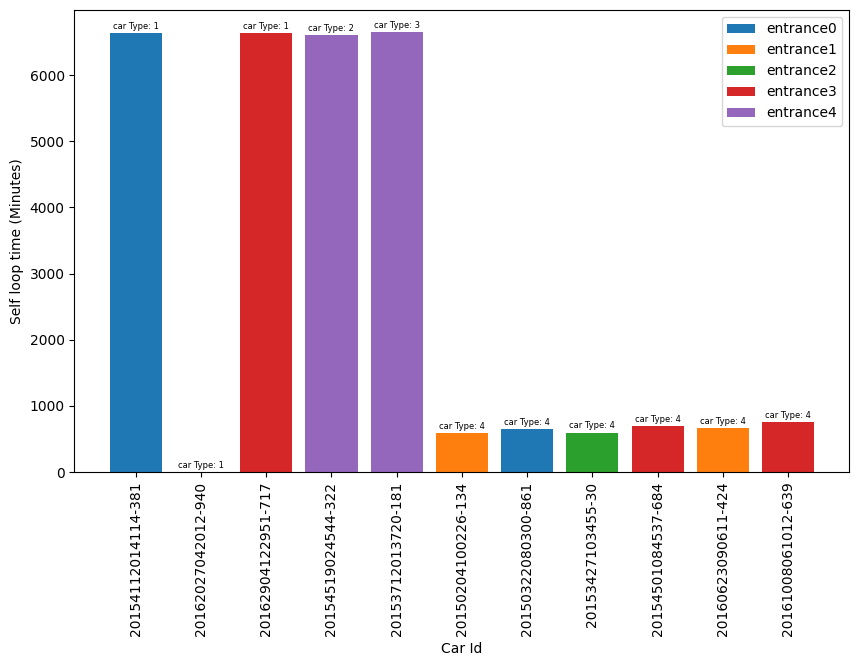

In [6]:
fig,ax = plt.subplots(figsize=(10,6))

for col in outliers.columns[5:10]:
    bars = ax.bar(outliers['car-id'],outliers[col],label=col)
    for bar,car_type in zip(bars,outliers['car_type']):
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'car Type: {car_type}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center',
                    fontsize=6)
    
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Car Id')
ax.set_ylabel('Self loop time (Minutes)')
ax.legend()
plt.show()

In [55]:
X = []
Y = []
Size = []
X_b = []
Y_b = []
car_types = []
new_df =  pd.DataFrame()
count = []
ent = []
for i in outliers['car-id']:
    x =[]
    y = []
    for gate, value in self_loop_df[self_loop_df['car-id']==i][self_loop_df.columns[14:19]].T.iterrows():
        if list(value)[0] >0:
            Size.append(list(value))
            point_ = pos[gate]
            X_b.append(point_[0])
            Y_b.append(point_[1])
            ent.append(gate)
            break
    temp =  df[df['car-id']==i]
    new_df = pd.concat((temp,new_df))
    car_types.append(f"car type: {np.unique(temp['car-type'])[0]} Id : {i}")
    for j in temp['gate-name']:
        point =  pos[j]
        x.append(point[0])
        y.append(point[1])
    count.append(temp[temp['gate-name']==gate]['gate-name'].count())
    X.append(x)
    Y.append(y)

In [56]:
texts = [f"Gate: {gate} <br> Time : {time_[0]} <br> Count : {c}" for gate,time_,c in zip(ent,Size,count)]

In [57]:
texts

['Gate: entrance0 <br> Time : 6637.3 <br> Count : 14',
 'Gate: entrance4 <br> Time : 4.03 <br> Count : 5',
 'Gate: entrance3 <br> Time : 6639.97 <br> Count : 12',
 'Gate: entrance4 <br> Time : 6611.17 <br> Count : 31',
 'Gate: entrance4 <br> Time : 6654.0 <br> Count : 7',
 'Gate: entrance1 <br> Time : 582.32 <br> Count : 3',
 'Gate: entrance0 <br> Time : 647.02 <br> Count : 3',
 'Gate: entrance2 <br> Time : 595.8 <br> Count : 3',
 'Gate: entrance3 <br> Time : 692.25 <br> Count : 3',
 'Gate: entrance1 <br> Time : 659.03 <br> Count : 3',
 'Gate: entrance3 <br> Time : 755.17 <br> Count : 3']

4531     1
6853     1
7002     1
10501    2
13828    3
15272    4
15299    4
15738    4
15914    4
16150    4
16172    4
Name: car_type, dtype: int64

In [62]:
with open("./invert_f.jpg", "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

# Create figure
fig = go.Figure()
traces = []
traces.append(go.Scatter(x=[25,900], y=[25,900], mode='markers', marker=dict(size=1, color="rgba(255,0,0,0.5)"), name='',showlegend=False))
for ind in range(11):
    trace_bubble = go.Scatter(x=[X_b[ind]], y=[Y_b[ind]], text = texts[ind],mode='markers', marker=dict(size=20, color="rgba(255,0,0,0.5)"), name='',showlegend=False)
    trace_line =  go.Scatter(x=X[ind], y=Y[ind], mode='lines',line=dict(color="rgba(255,0,0,0.5)", width=2, dash='dashdot'), name="",showlegend=False)
    if X[ind][0]==X[ind][-1] and  Y[ind][0]==Y[ind][-1]:
        text1 = "I/O"
        text2 = "I/O"
    else:
        text1 = "IN"
        text2 = "OUT" 
    trace_start = go.Scatter(x=[X[ind][0]-20], y=[Y[ind][0]-20], mode='text',text=text1,textfont=dict(size=10,color="rgb(0,0,255)"), name='',showlegend=False)
    trace_end = go.Scatter(x=[X[ind][-1]-20], y=[Y[ind][-1]-20], mode='text',text=text2,textfont=dict(size=10,color="rgb(0,0,255)"),name='',showlegend=False)
    traces.append(trace_start)
    traces.append(trace_bubble)
    traces.append(trace_line)
    traces.append(trace_end)
    


button_dic = []
count = 1
for cartid,cartype in zip(outliers['car-id'],outliers['car_type']):
    vis = [True]
    for i in car_types:
        if i.endswith(cartid):
            vis.append(True)
            vis.append(True)
            vis.append(True)
            vis.append(True)
        else:
            vis.append(False)
            vis.append(False)
            vis.append(False)
            vis.append(False)
    temp = dict(label=f"{count}",
        method="update",
        args=[{"visible": vis},
            {"title":  f" Car Type : {cartype}  <br>Car Id : {cartid}",
            "annotations": []}])
    count+=1
    button_dic.append(temp)

fig = go.Figure(data=traces)

fig.add_layout_image(
        dict(
            source=f"data:./invert_f.jpg;base64,{encoded_image}",
            xref="x",
            yref="y",
            x=0,
            y=982,
            sizex=982,
            sizey=982,
            opacity=1,
             sizing="stretch",
            layer="below")
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=button_dic,
        )
    ])

# Set templates
fig.update_layout(height=982,
   width=982,
)

fig.write_html("anamoly_selfloop_at_entrance.html", include_plotlyjs="cdn")
# fig.show()

In [442]:
print(list(df[df['car-id']=="20154112014114-381"]['gate-name']))

['entrance0', 'general-gate1', 'ranger-stop2', 'ranger-stop0', 'general-gate2', 'general-gate5', 'camping6', 'camping6', 'general-gate5', 'general-gate2', 'ranger-stop0', 'ranger-stop2', 'general-gate1', 'entrance0', 'entrance0', 'general-gate1', 'ranger-stop2', 'ranger-stop0', 'general-gate2', 'general-gate5', 'camping6', 'camping6', 'general-gate5', 'general-gate2', 'ranger-stop0', 'ranger-stop2', 'general-gate1', 'entrance0', 'entrance0', 'general-gate1', 'ranger-stop2', 'ranger-stop0', 'general-gate2', 'general-gate5', 'camping6', 'camping6', 'general-gate5', 'general-gate2', 'ranger-stop0', 'ranger-stop2', 'general-gate1', 'entrance0', 'entrance0', 'general-gate1', 'ranger-stop2', 'ranger-stop0', 'general-gate2', 'general-gate5', 'camping6', 'camping6', 'general-gate5', 'general-gate2', 'ranger-stop0', 'ranger-stop2', 'general-gate1', 'entrance0', 'entrance0', 'general-gate1', 'ranger-stop2', 'ranger-stop0', 'general-gate2', 'general-gate5', 'camping6', 'camping6', 'general-gate5'

In [412]:
i['args'][0]['visible']

[True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [386]:
np.unique

array(['1', '2', '3', '4'], dtype=object)